<a href="https://colab.research.google.com/github/FRgama/PIDados/blob/main/PIDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install python-bcb

In [3]:
from bcb import sgs

## **Agrupando Dados**


Taxa Selic:

In [4]:
selic = sgs.get({'Selic' : 1178}, start='2020-01-01')
dfSelic = selic.reset_index()

In [5]:
import matplotlib.pyplot as plt

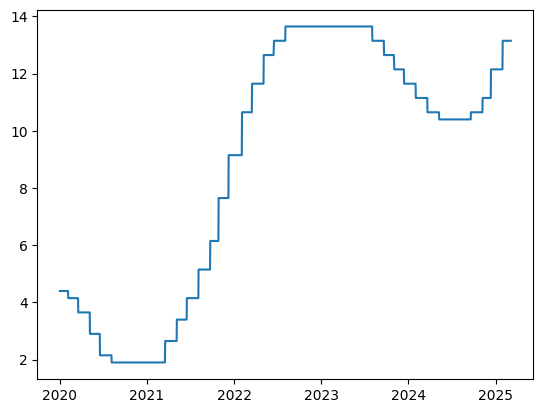

In [6]:
plt.plot(dfSelic.Date, dfSelic.Selic)

IPCA:

In [7]:
ipca = sgs.get({'Ipca': 4449}, start='2020-01-01')
dfIpca = ipca.reset_index()

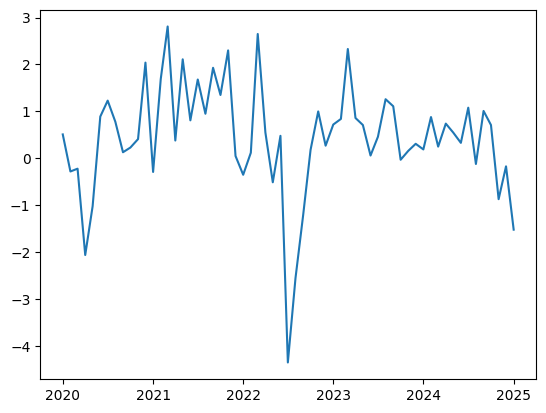

In [8]:
plt.plot(dfIpca.Date, dfIpca.Ipca)

Salario Minimo:

In [9]:
sMin = sgs.get({'Salario_Minimo': 1619}, start='2020-01-01')
dfSMin = sMin.reset_index()

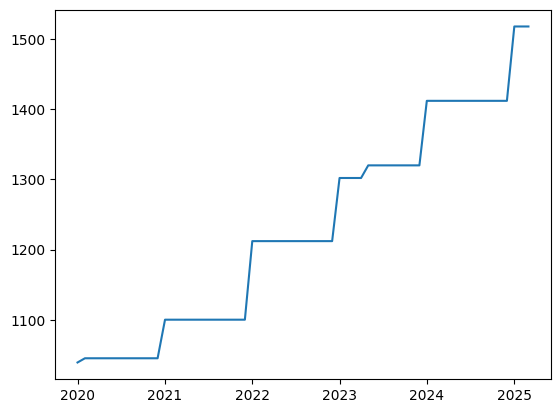

In [10]:
plt.plot(dfSMin.Date, dfSMin.Salario_Minimo)

Igp-M:

In [11]:
igpm = sgs.get({'Igmp':189},start='2020-01-01')
dfIgpm = igpm.reset_index()

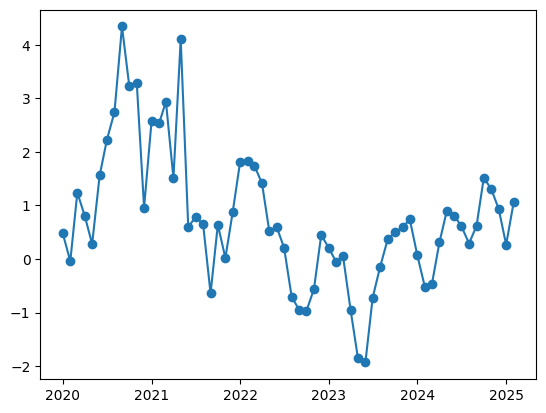

In [12]:
plt.plot(dfIgpm.Date, dfIgpm.Igmp, marker='o')

Taxa de Inadimplencia:

In [13]:
inad = sgs.get({'Inadimplencia': 21082}, start='2020-01-01')
dfInad= inad.reset_index()

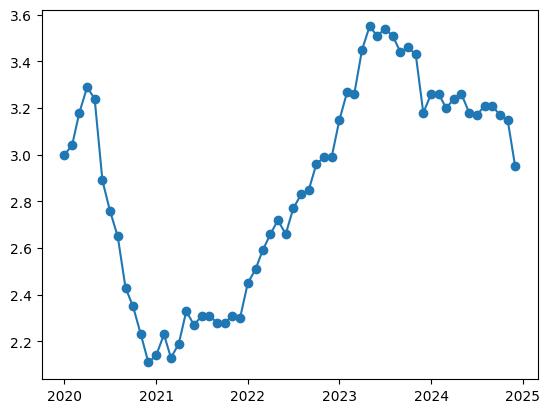

In [14]:
plt.plot(dfInad.Date, dfInad.Inadimplencia, marker='o')

Índice Ibovespa

In [15]:
import pandas as pd
import numpy as np

In [17]:
file_path = "indiceIbovespa.csv"


df = pd.read_csv(file_path, sep=';', skiprows=1, encoding='latin1', decimal=',')

In [18]:
df

,Mês,Ano,Valor
0,1,2019,"97.393,75"
1,2,2019,"95.584,35"
2,3,2019,"95.414,56"
3,4,2019,"96.353,33"
4,5,2019,"97.030,32"
...,...,...,...
69,10,2024,"129.713,33"
70,11,2024,"125.667,83"
71,12,2024,"120.283,40"
72,1,2025,"126.134,94"


In [19]:
import pandas as pd
import matplotlib.pyplot as plt


df['Valor'] = df['Valor'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float) #"Limpando" a coluna de valores

df['Data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mês'].astype(str), format='%Y-%m') #Criando uma coluna de datas

df = df.sort_values('Data') #Organizando valores

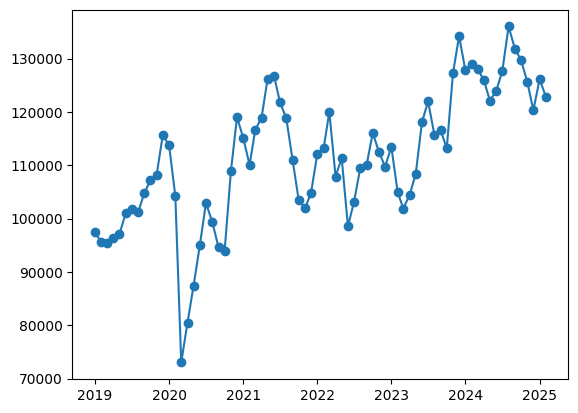

In [21]:
dadosIbovespa = df[['Valor', 'Data']] #Simplificando os dados
dadosIbovespa
plt.plot(dadosIbovespa['Data'],dadosIbovespa['Valor'], marker='o')

## **Correlação dos dados**



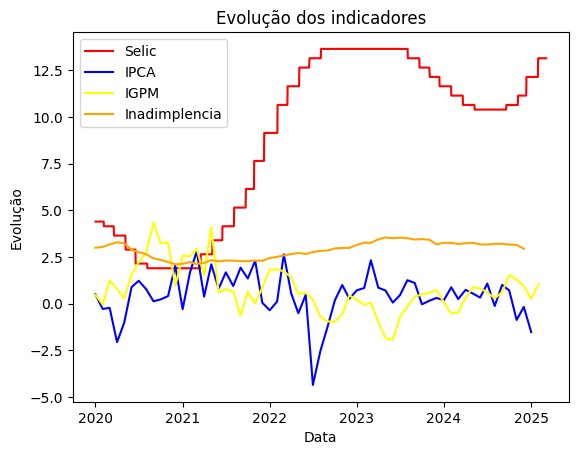

In [49]:
plt.plot(dfSelic.Date, dfSelic.Selic, color='red')
plt.plot(dfIpca.Date, dfIpca.Ipca, color='blue')
plt.plot(dfIgpm.Date, dfIgpm.Igmp, color='yellow')
plt.plot(dfInad.Date, dfInad.Inadimplencia, color='orange')
plt.title("Evolução dos indicadores")
plt.xlabel("Data")
plt.ylabel("Evolução")
plt.legend(['Selic', 'IPCA', 'IGPM', 'Inadimplencia'])
plt.show()

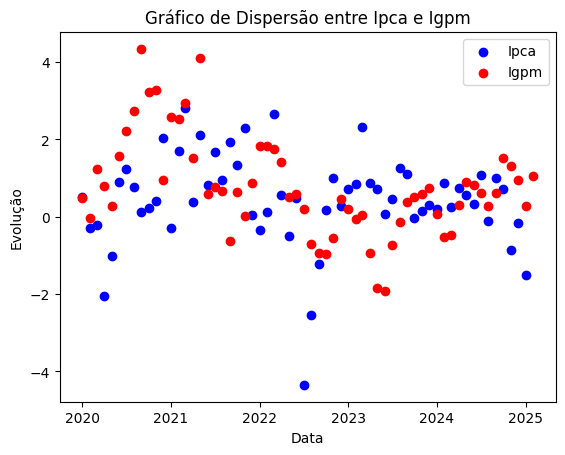

In [48]:
plt.scatter(dfIpca.Date, dfIpca.Ipca, color='blue')
plt.scatter(dfIgpm.Date, dfIgpm.Igmp, color='red')
plt.xlabel('Data')
plt.ylabel('Evolução')
plt.title('Gráfico de Dispersão entre Ipca e Igpm')
plt.legend(['Ipca', 'Igpm'])
plt.show()

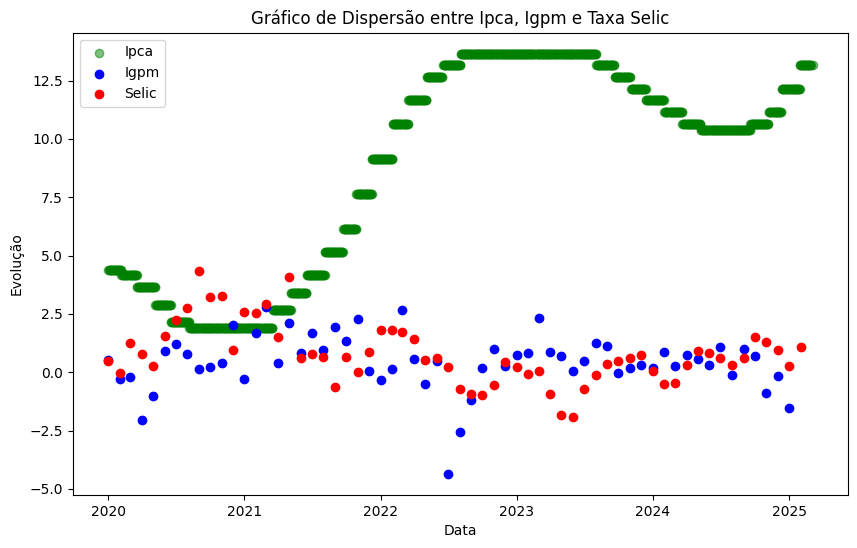

In [61]:
plt.figure(figsize=(10, 6))

plt.scatter(dfSelic.Date, dfSelic.Selic, color='green', alpha=0.5)
plt.scatter(dfIpca.Date, dfIpca.Ipca, color='blue')
plt.scatter(dfIgpm.Date, dfIgpm.Igmp, color='red')

plt.xlabel('Data')
plt.ylabel('Evolução')
plt.title('Gráfico de Dispersão entre Ipca, Igpm e Taxa Selic')
plt.legend(['Ipca', 'Igpm', 'Selic'])
plt.show()

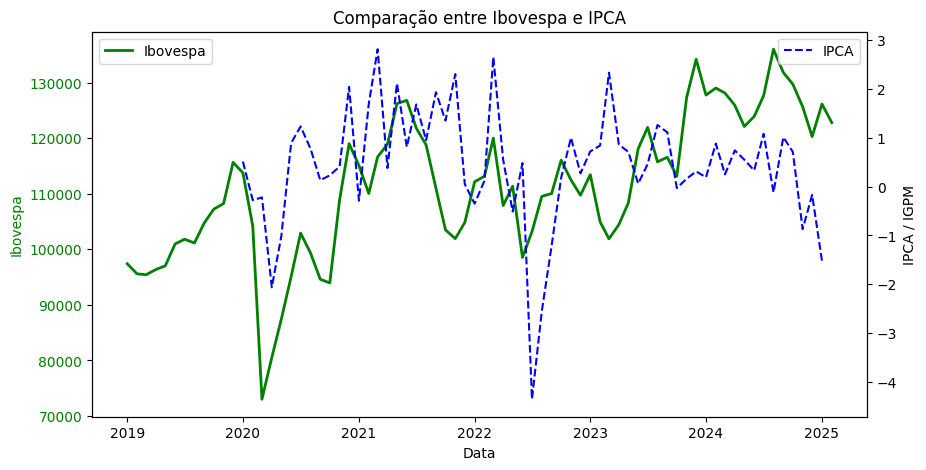

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Criando a figura e o eixo principal (Ibovespa)
fig, ax1 = plt.subplots(figsize=(10,5))

# Plotando o Ibovespa (escala maior)
ax1.plot(dadosIbovespa['Data'], dadosIbovespa['Valor'], color="green", label="Ibovespa", linewidth=2)
ax1.set_xlabel("Data")
ax1.set_ylabel("Ibovespa", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Criando o segundo eixo Y (IPCA e IGPM)
ax2 = ax1.twinx()

# Plotando IPCA e IGPM (escala menor)
ax2.plot(dfIpca.Date, dfIpca.Ipca, color="blue", linestyle="dashed", label="IPCA")
ax2.set_ylabel("IPCA / IGPM", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Adicionando legendas
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Comparação entre Ibovespa e IPCA")
plt.show()
